In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import torch
import torch.nn as nn
import torch.optim as optim
import pickle

In [2]:
original_stream = pickle.load(open('dataset.pkl', 'rb'))['clean']

seed = 0
torch.manual_seed(seed)
try: 
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
except:
    pass

class TDNN(nn.Module):
    def __init__(self):
        super(TDNN, self).__init__()
        self.fc1 = nn.Linear(10*25, 200)
        self.fc2 = nn.Linear(200, 25)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x
class Encoder():
    def __init__(self):
        self.encodings = {}

    def encode(self, x):
        if x in self.encodings:
            return self.encodings[x]
        self.encodings[x] = torch.rand(25)*2 - 1
        return self.encodings[x]

    def decode(self, v):
        nearest = None
        best = float('inf')
        for x, e in self.encodings.items():
            dist = (torch.sum((v - e).pow(2))).pow(0.5)
            if dist < best:
                best = dist
                nearest = x
        return nearest
    
    def precode(self, stream):
        for i in stream:
            self.encode(i)
def add_noise(stream):
    ret = list(stream)
    for i in range(len(ret)):
        u = torch.rand(1)
        if u <  0:
            ret[i] = stream[int(torch.randint(0, len(stream), (1, )))]
    return ret

tdnn = TDNN()
criterion = nn.MSELoss()
optimizer = optim.SGD(tdnn.parameters(), lr=0.01)
original_stream = pickle.load(open('dataset.pkl', 'rb'))['clean']
encoder = Encoder()
stream = add_noise(original_stream)
encoder.precode(stream)

enc = list(encoder.encodings.items())
labels = [0]*len(enc)
matrix = np.zeros((len(enc), len(enc)))
for i, (k1, v1) in enumerate(enc):
    labels[i] = k1
    for j, (k2, v2) in enumerate(enc):
        matrix[i][j] = float(torch.sum(torch.pow(v1-v2, 2)))

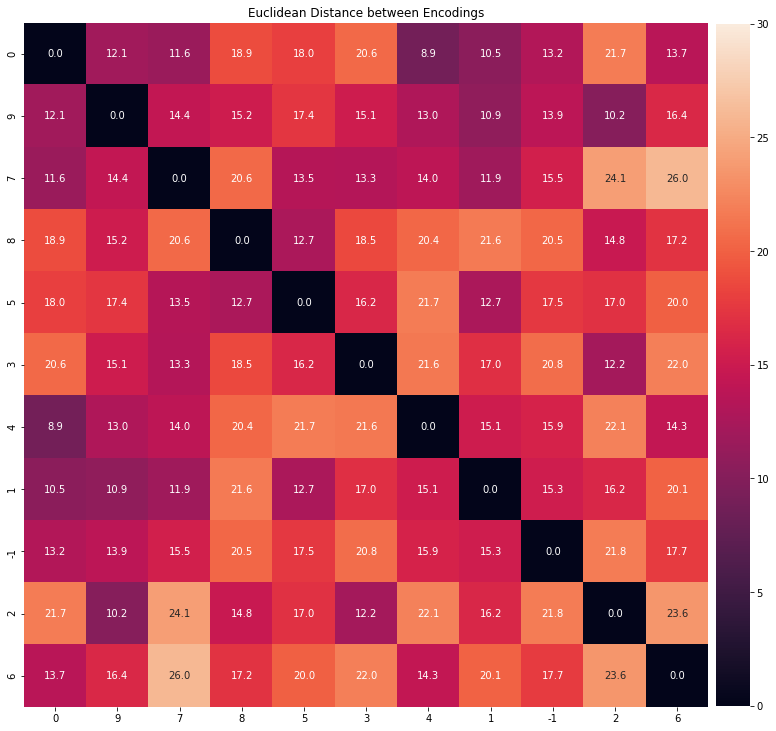

In [3]:
plt.figure(figsize=(13, 13))
plt.title('Euclidean Distance between Encodings')
sns.heatmap(matrix, annot=True, fmt='.1f', square=True, vmin=0, vmax=30, xticklabels=labels, yticklabels=labels, cbar_kws={'orientation': 'vertical', 'fraction': 0.047, 'pad': 0.01})
plt.savefig('matrix-distances.pdf', dpi=200)
plt.savefig('matrix-distances.png', dpi=200, bbox_inches='tight')
plt.show()

In [4]:
np.max(matrix), sorted(matrix.reshape(-1).tolist())[12]

(25.986194610595703, 8.851757049560547)

2356


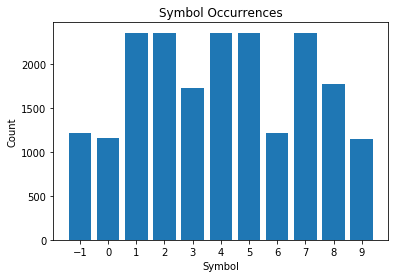

In [5]:
original_stream = pickle.load(open('dataset.pkl', 'rb'))['clean']
print(original_stream.count(-1))
labels, values = zip(*Counter(original_stream).items())
indexes = np.arange(len(labels)) - 1
plt.bar(indexes, values)
plt.xticks(labels)
plt.xlabel('Symbol')
plt.ylabel('Count')
plt.title('Symbol Occurrences')
plt.savefig('symbol-occurrences.pdf', dpi=200)
plt.show()

In [6]:
x, y = [], []
for i in range(-1, 10):
    x.append(i)
    y.append(original_stream.count(i))

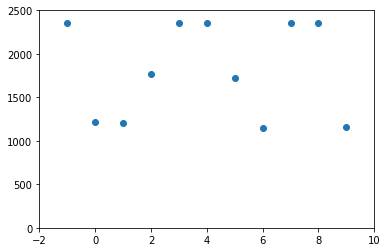

In [7]:
plt.scatter(x, y)
plt.xlim(-2, 10)
plt.ylim(0, 2500)
plt.show()